<a href="https://colab.research.google.com/github/Gagancoder/-F-R-D-DDY-/blob/main/class_119_DECISION_TREE_HW.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

`Importing CSV`

In [1]:
from google.colab import files
data_to_load = files.upload()

Saving titanic.csv to titanic.csv


`Import's`

In [2]:
import csv
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.tree import export_graphviz 
from sklearn.externals.six import StringIO
from IPython.display import Image
import pydotplus

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


`Nameing the Columns`

In [3]:
col_names = ["id","PClass","Sex","Age","SibSp","parch","live"]


`Fetching Data`

In [10]:
df = pd.read_csv("titanic.csv",names = col_names ).iloc[1:]


`X and y`

In [6]:
features = ["id","PClass","Sex","Age","SibSp","parch","live"]
X = df[features]

y = df.live

`Training and Testing the Data`

In [17]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.25,random_state = 0)
clf = DecisionTreeClassifier()
clf = clf.fit(X_train,y_train)
y_predict = clf.predict(X_test)

`Taking out the accuracy`

In [18]:
print("Accuracy :  ",metrics.accuracy_score(y_test,y_predict))

Accuracy :   1.0


`Converting the data to the Text which can be readable and understandable`

In [19]:
dot_data = StringIO()
export_graphviz(clf,out_file = dot_data,filled = True, rounded = True,special_characters = True,feature_names = features,class_names = ["0","1"])
print(dot_data.getvalue())

digraph Tree {
node [shape=box, style="filled, rounded", color="black", fontname=helvetica] ;
edge [fontname=helvetica] ;
0 [label=<live &le; 0.5<br/>gini = 0.474<br/>samples = 668<br/>value = [410, 258]<br/>class = 0>, fillcolor="#f5d0b6"] ;
1 [label=<gini = 0.0<br/>samples = 410<br/>value = [410, 0]<br/>class = 0>, fillcolor="#e58139"] ;
0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;
2 [label=<gini = 0.0<br/>samples = 258<br/>value = [0, 258]<br/>class = 1>, fillcolor="#399de5"] ;
0 -> 2 [labeldistance=2.5, labelangle=-45, headlabel="False"] ;
}


`Converting to the Graph or Image`

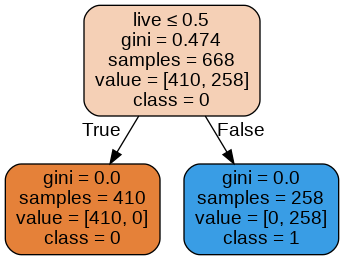

In [20]:
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png("titanic.png") 
Image(graph.create_png()) 